In [20]:
import numpy as np
import pandas as pd
# import Bio as biopython
# from Bio import SeqIO
# from Bio.Seq import Seq
import gzip
import glob
import os

import matplotlib.pyplot as plt
%matplotlib inline


# Sequencing processing

I'm going to load each P5 side read .FASTA file as a Pandas DataFrame; 

In [21]:
# load in sgRNA library IDs
# df_IDs = pd.read_csv('../../data/seq/Sanson_Dolc_CRISPRI_IDs_libA.csv')
df_IDs = pd.read_csv('../../data/screen_libraries/20211027_galvo_ecm_diff_simple.csv')

df_IDs = df_IDs[df_IDs.screen == 'galvanotaxis']


In [22]:
# files = glob.glob('../../data/seq/20230415_galvo_sublib/NB*/*_1.fq.gz')
files = glob.glob('/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230*_galvo_sublib/01.RawData/NB*/*_1.fq.gz')
files

['/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB14/NB14_CKDL230009157-1A_H3TNFDSX7_L3_1.fq.gz',
 '/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB14/NB14_CKDL230009157-1A_H5HJGDSX7_L1_1.fq.gz',
 '/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB09/NB09_CKDL230009152-1A_H3TNFDSX7_L3_1.fq.gz',
 '/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB09/NB09_CKDL230009152-1A_H5HJGDSX7_L4_1.fq.gz',
 '/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB12/NB12_CKDL230009155-1A_H5HJGDSX7_L4_1.fq.gz',
 '/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB12/NB12_CKDL230009155-1A_H3TNFDSX7_L3_1.fq.gz',
 '/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB11/NB11_CKDL230009154-1A_H5HJGDSX7_L4_1.fq.gz',
 '/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.Ra

In [23]:
# !conda install -c bioconda seqtk

/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB14/NB14_CKDL230009157-1A_H3TNFDSX7_L3_1.fq.gz
Number of sequences matched:  17188190
Number of sequences NOT matched:  1263727 (6.84%)
/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB14/NB14_CKDL230009157-1A_H5HJGDSX7_L1_1.fq.gz
Number of sequences matched:  25207250
Number of sequences NOT matched:  1824462 (6.74%)
/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB09/NB09_CKDL230009152-1A_H3TNFDSX7_L3_1.fq.gz
Number of sequences matched:  11315026
Number of sequences NOT matched:  837492 (6.89%)
/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB09/NB09_CKDL230009152-1A_H5HJGDSX7_L4_1.fq.gz
Number of sequences matched:  30908751
Number of sequences NOT matched:  2372779 (7.12%)
/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB12/NB12_CKDL230009155-1A_H5HJGDSX7_L4_1.fq.gz
Numbe

/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Number of sequences matched:  19602617
Number of sequences NOT matched:  1418820 (6.74%)
/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB03/NB03_CKDL230009151-1A_H5HJGDSX7_L4_1.fq.gz
Number of sequences matched:  21222567
Number of sequences NOT matched:  1590546 (6.97%)
/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB22/NB22_CKDL230009163-1A_H5HJGDSX7_L1_1.fq.gz
Number of sequences matched:  28979889
Number of sequences NOT matched:  1983144 (6.40%)
/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB22/NB22_CKDL230009163-1A_H3TNFDSX7_L3_1.fq.gz
Number of sequences matched:  12431192
Number of sequences NOT matched:  859556 (6.46%)
/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB10/NB10_CKDL230009153-1A_H5HJGDSX7_L4_1.fq.gz
Number of sequences matched:  27232013
Number of sequences NOT matched:  1848287 (6.35%)
/Volumes/ExpansionHomesA/nbelliveau/sequenci

Number of sequences matched:  33967251
Number of sequences NOT matched:  2090575 (5.79%)
/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230415_galvo_sublib/01.RawData/NB06/NB06_CKDL230007677-1A_H3TNCDSX7_L1_1.fq.gz
Number of sequences matched:  20220038
Number of sequences NOT matched:  1277615 (5.94%)
/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230415_galvo_sublib/01.RawData/NB37/NB37_CKDL230007708-1A_H3TM7DSX7_L3_1.fq.gz
Number of sequences matched:  9497921
Number of sequences NOT matched:  670648 (6.59%)
/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230415_galvo_sublib/01.RawData/NB37/NB37_CKDL230007708-1A_HT3K5DSX5_L1_1.fq.gz
Number of sequences matched:  34474183
Number of sequences NOT matched:  2601604 (7.01%)
/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230415_galvo_sublib/01.RawData/NB28/NB28_CKDL230007699-1A_H3TNCDSX7_L2_1.fq.gz
Number of sequences matched:  19949882
Number of sequences NOT matched:  1829898 (8.40%)
/Volumes/ExpansionHomesA/nbelliveau/sequencin

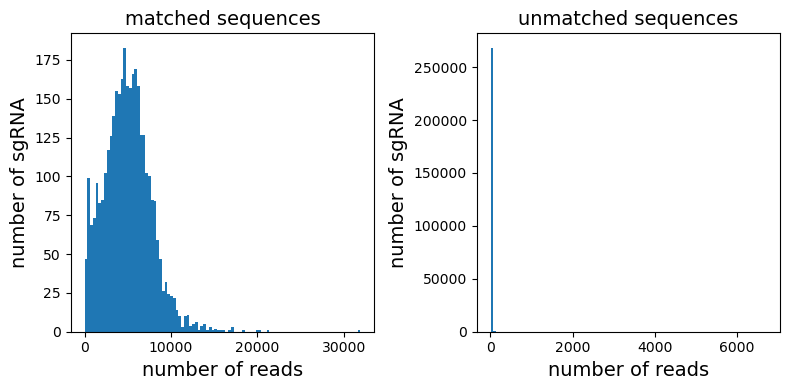

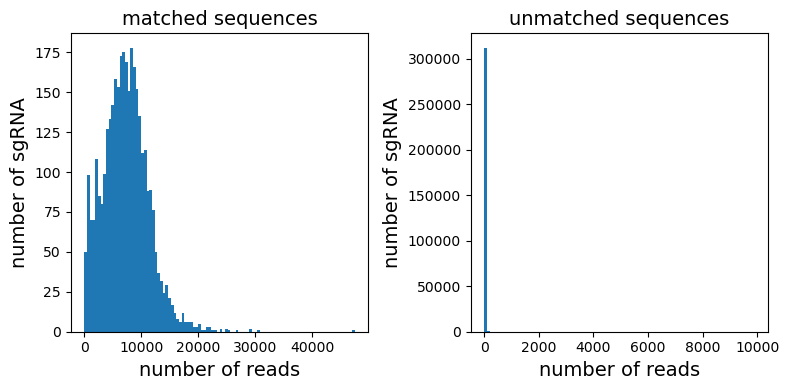

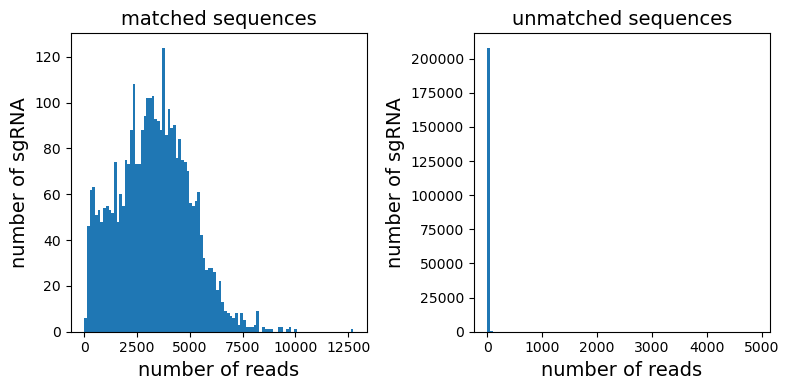

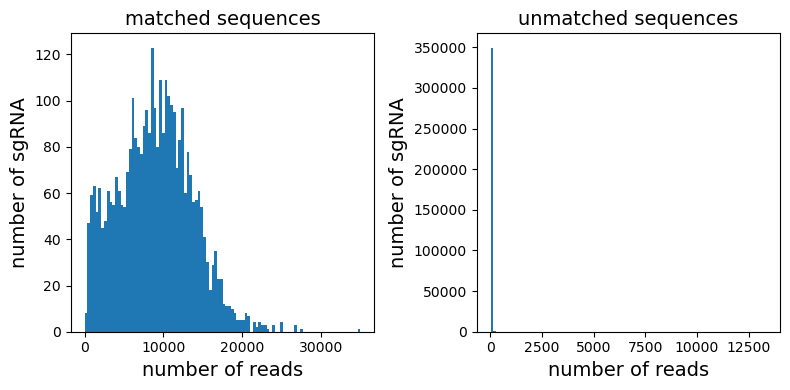

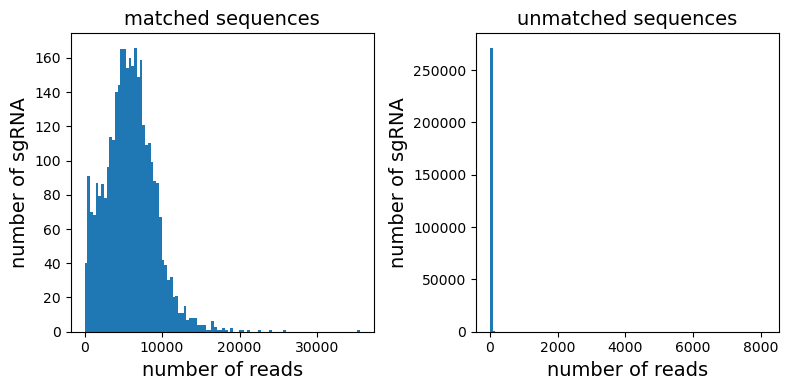

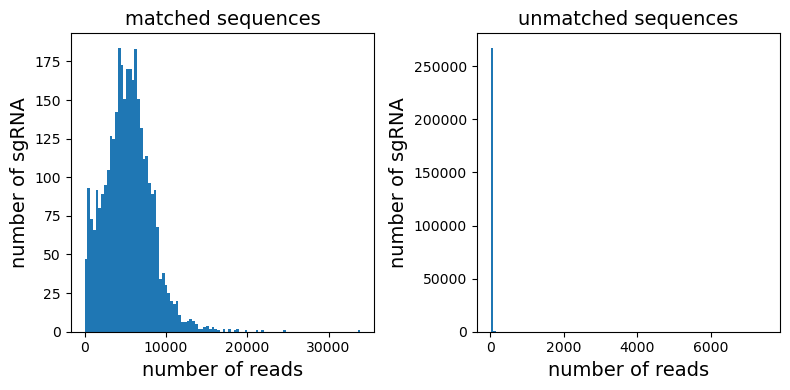

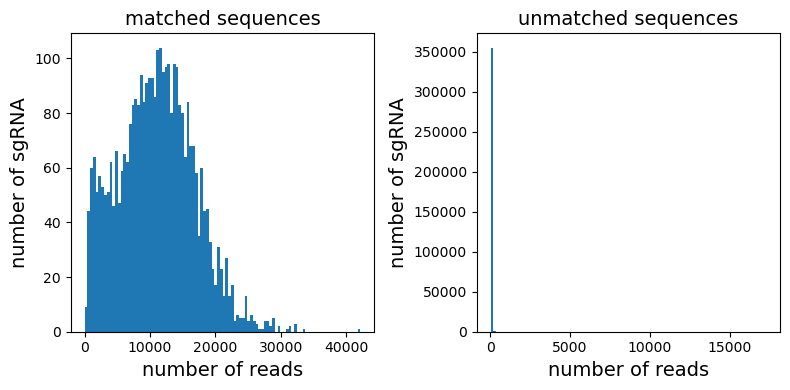

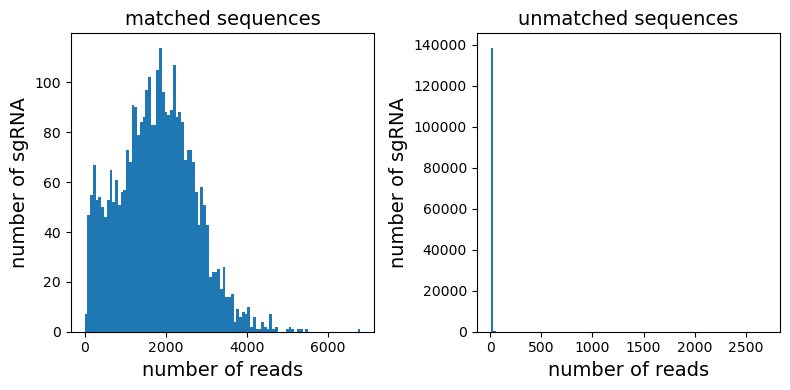

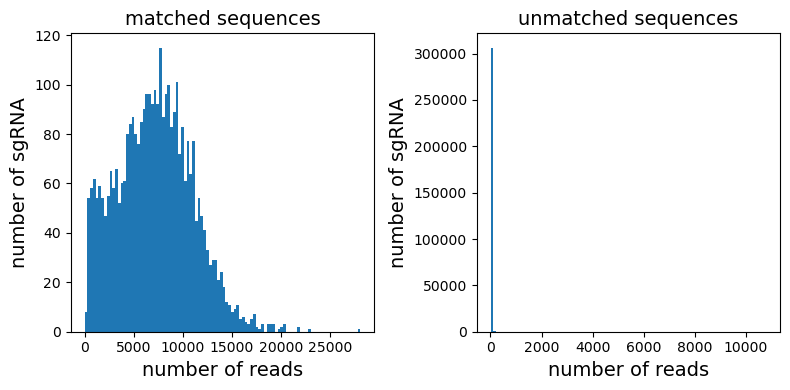

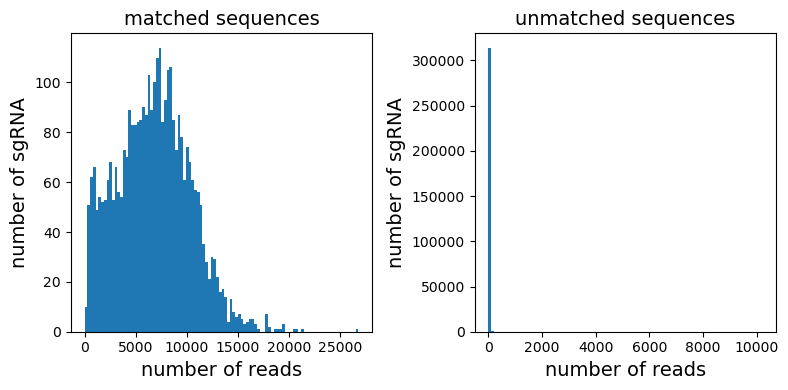

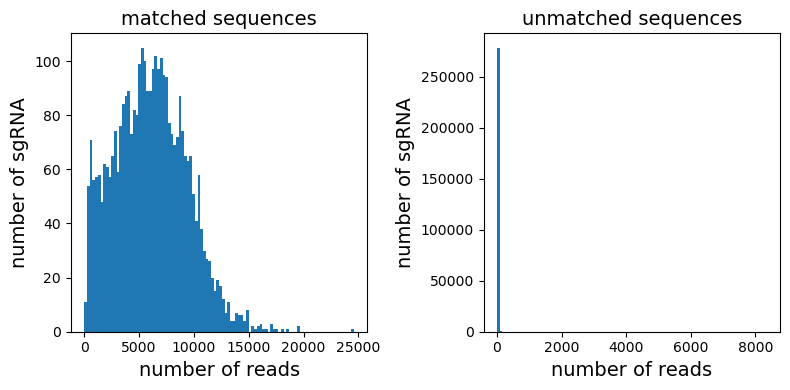

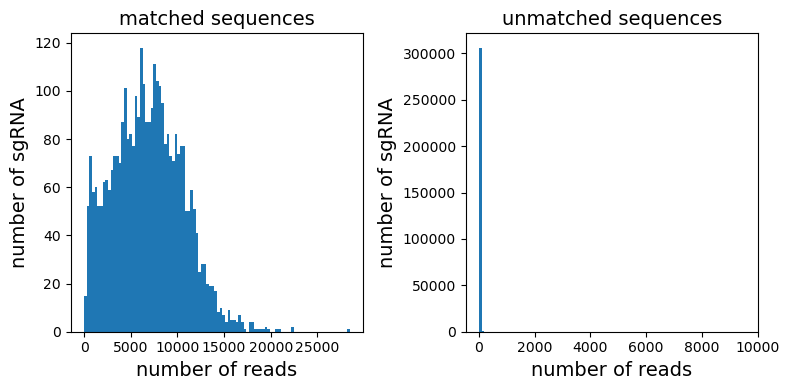

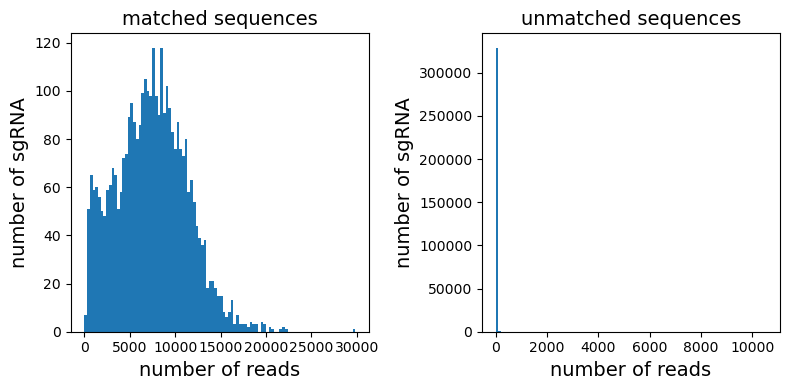

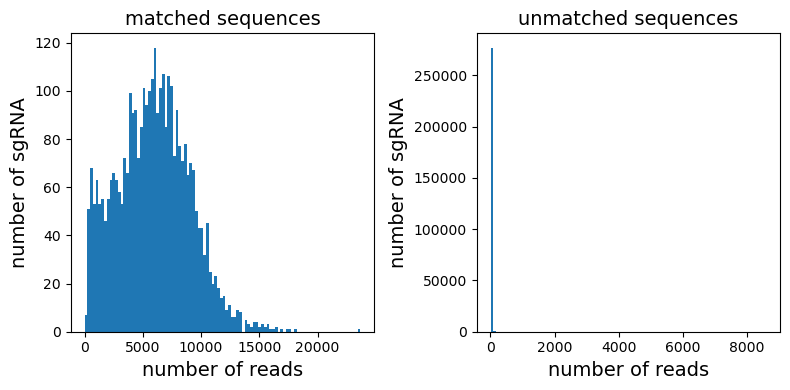

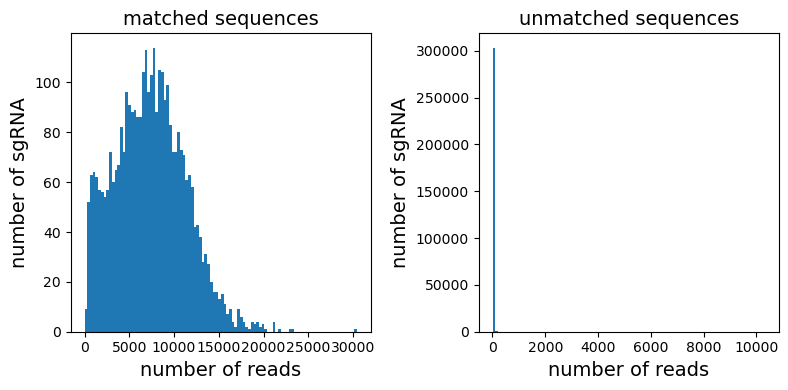

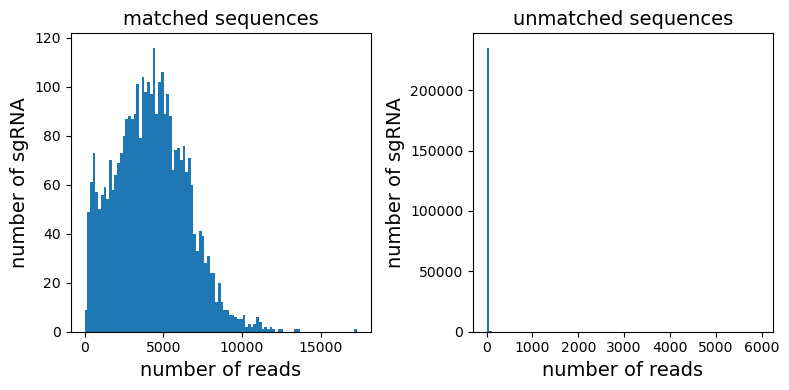

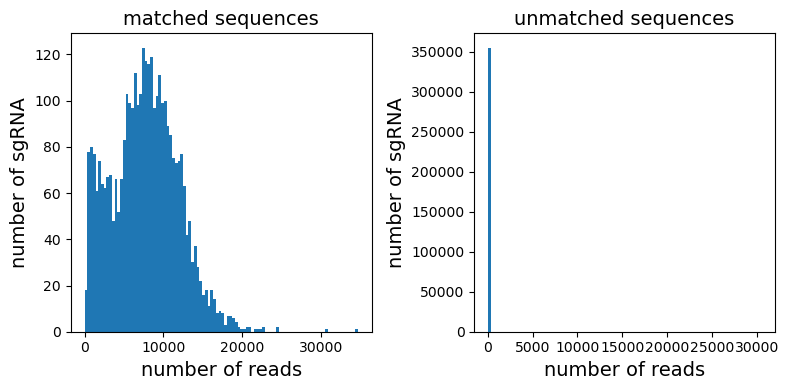

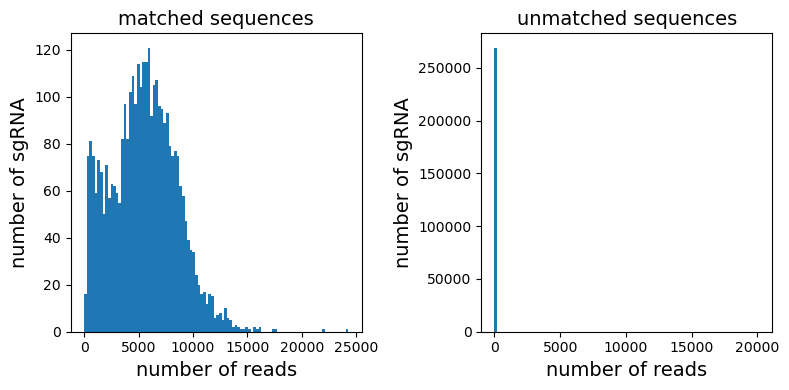

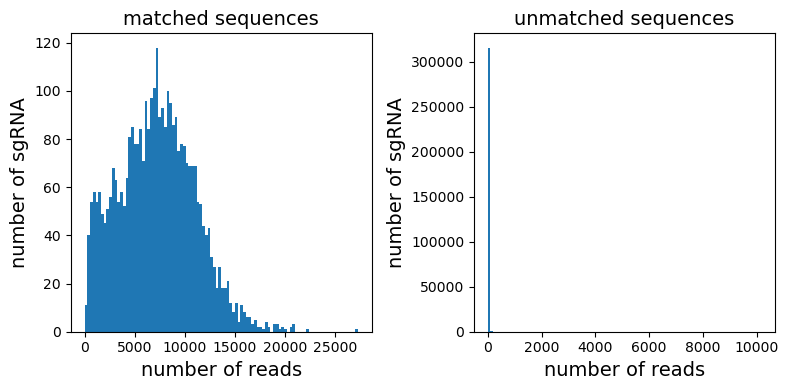

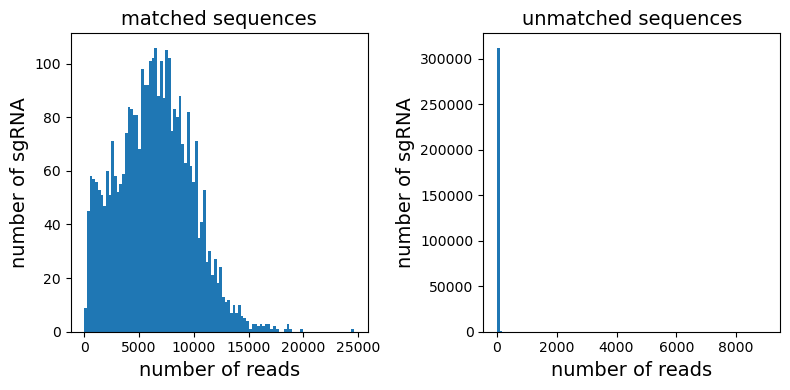

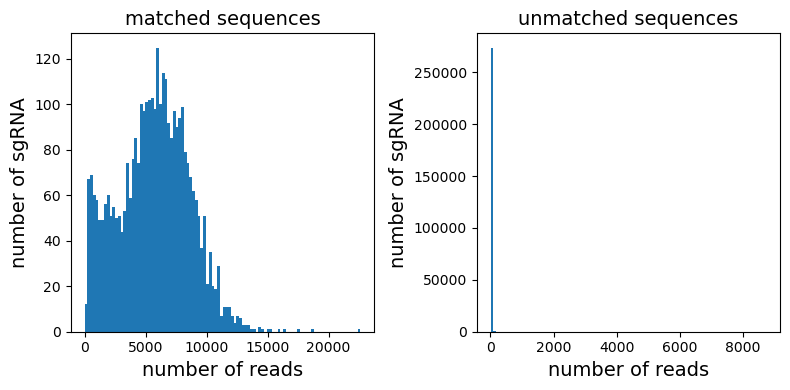

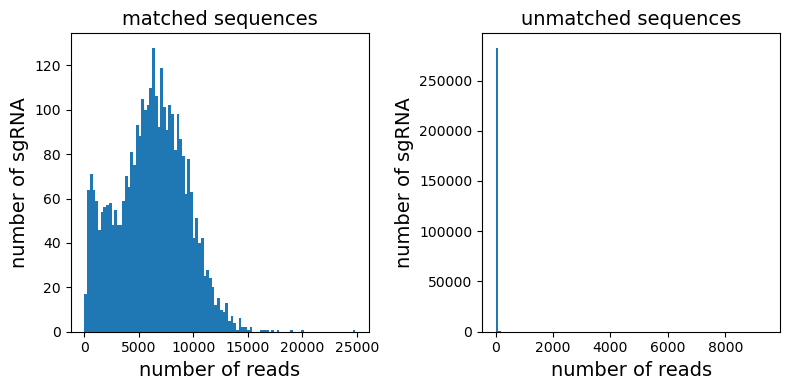

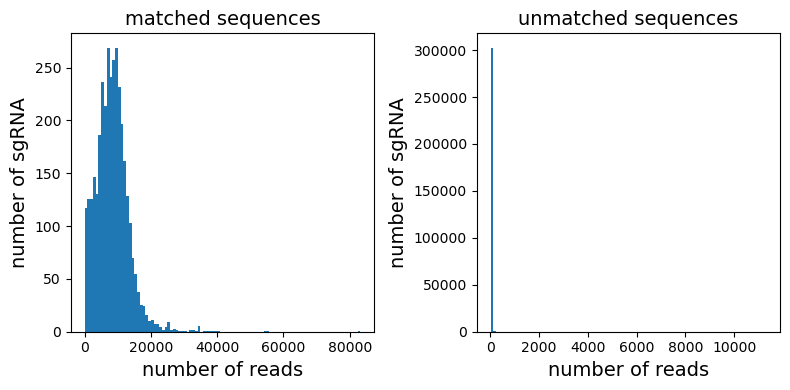

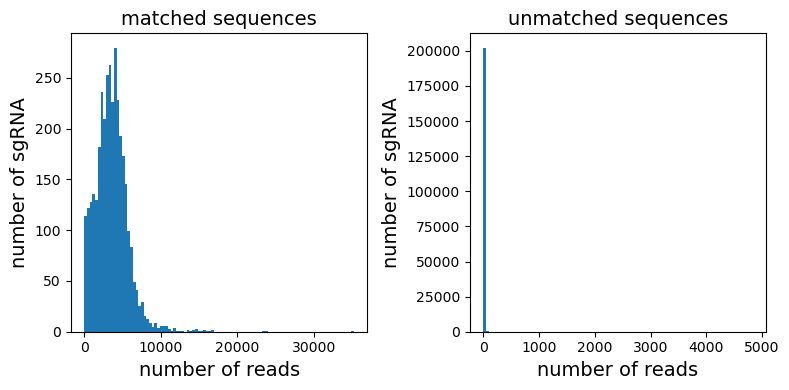

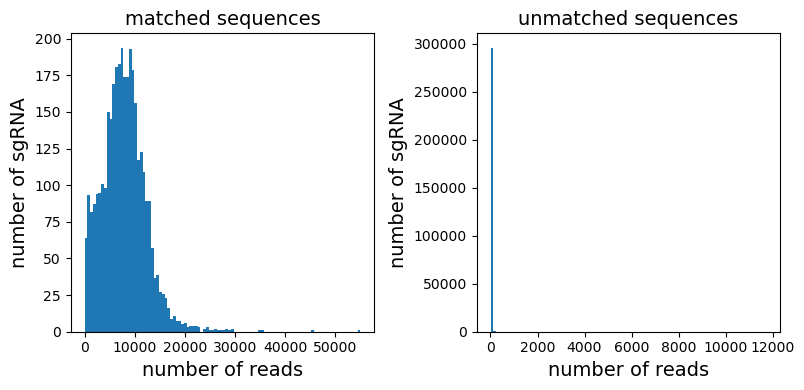

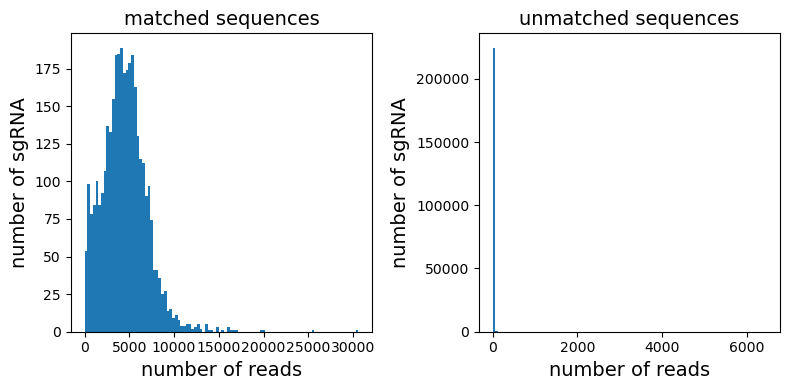

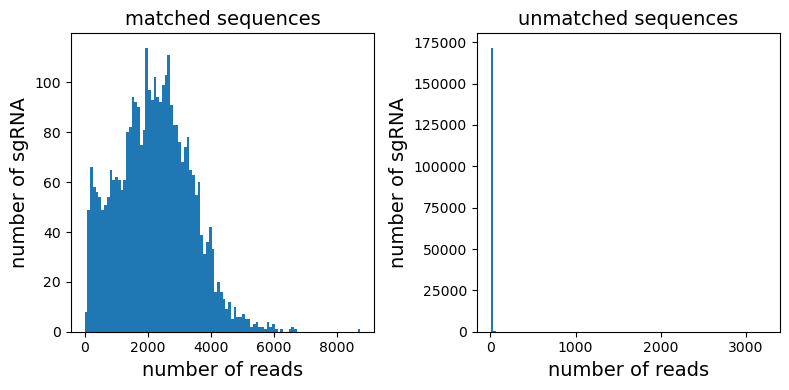

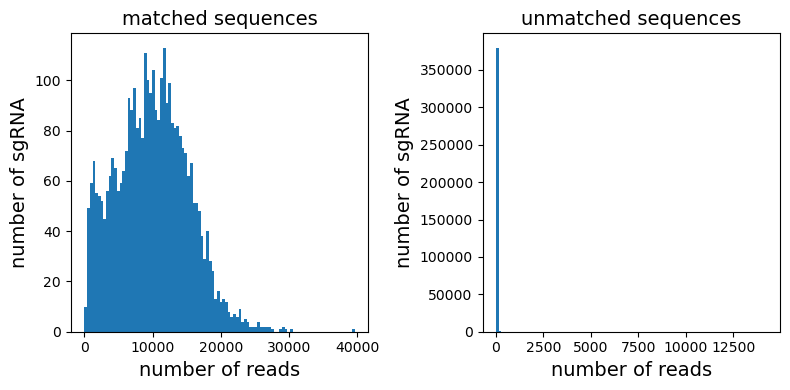

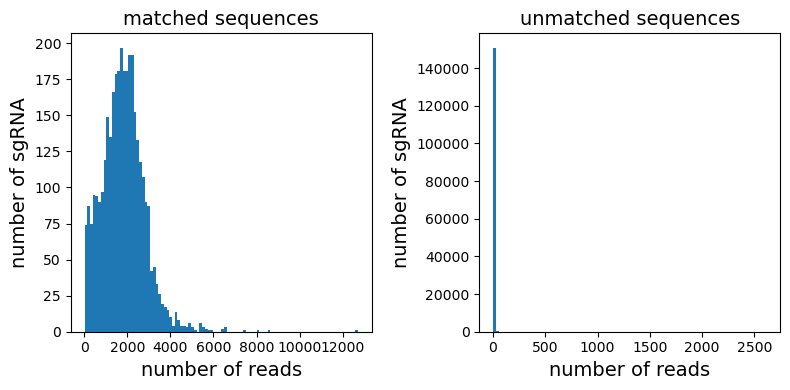

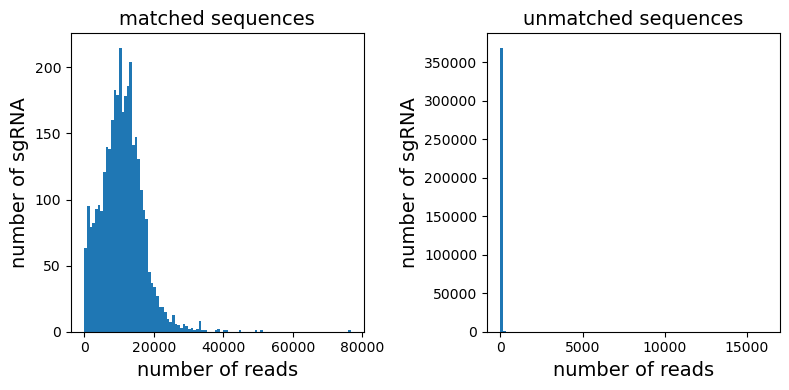

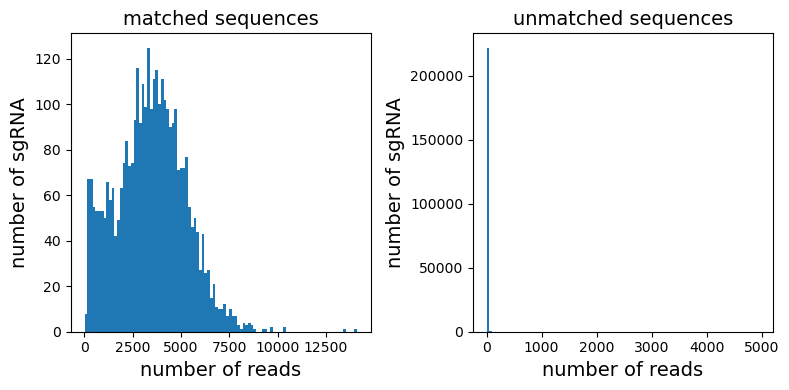

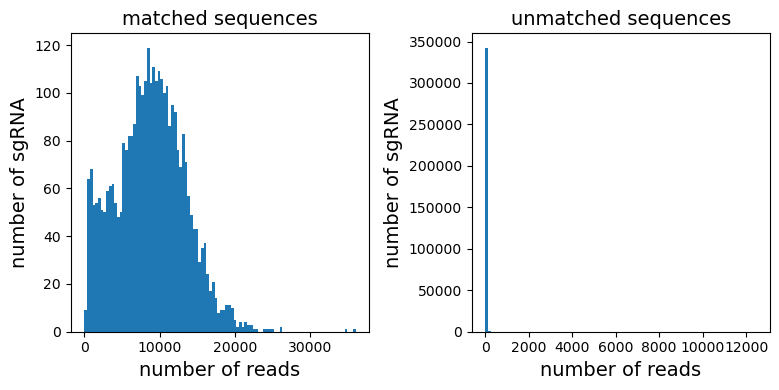

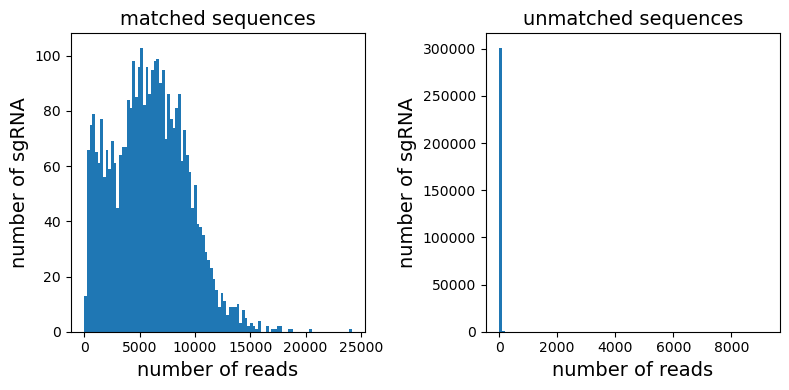

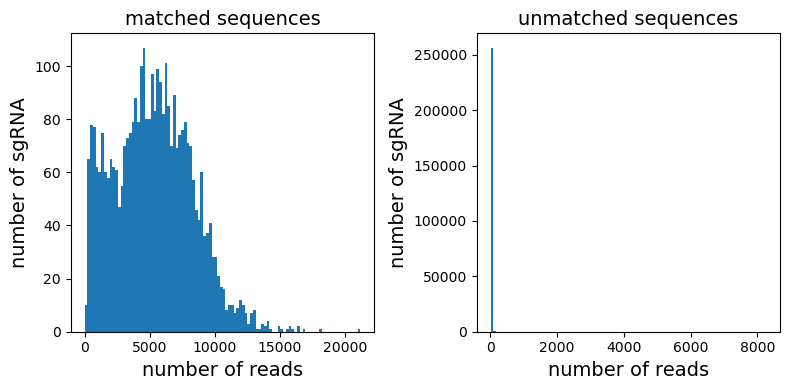

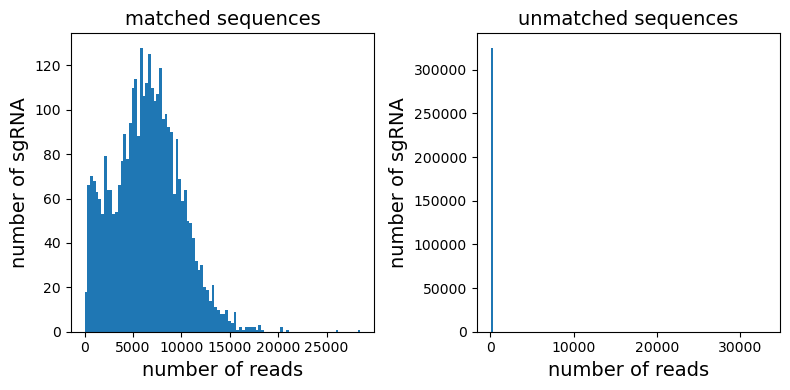

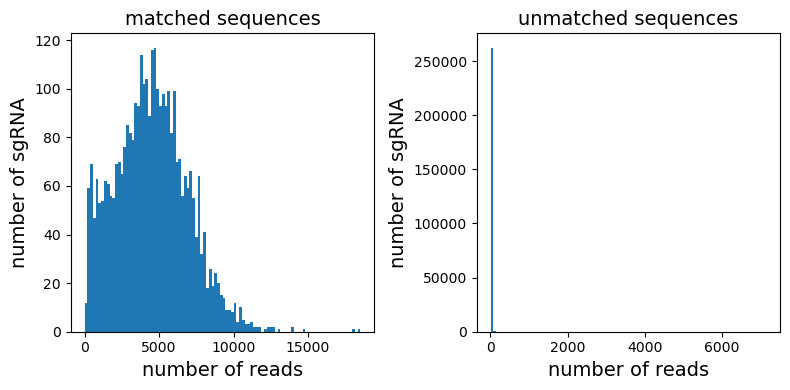

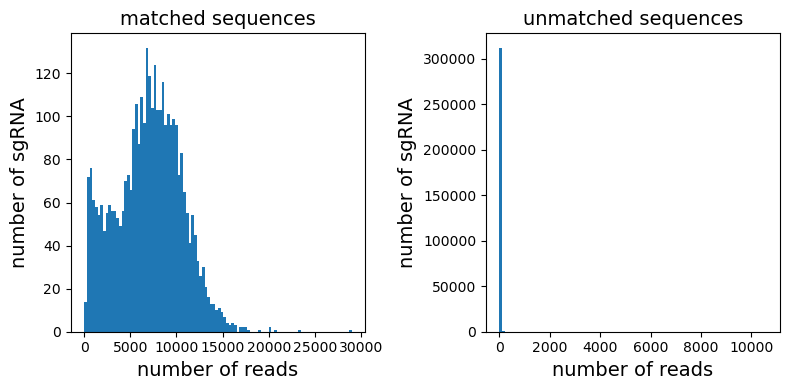

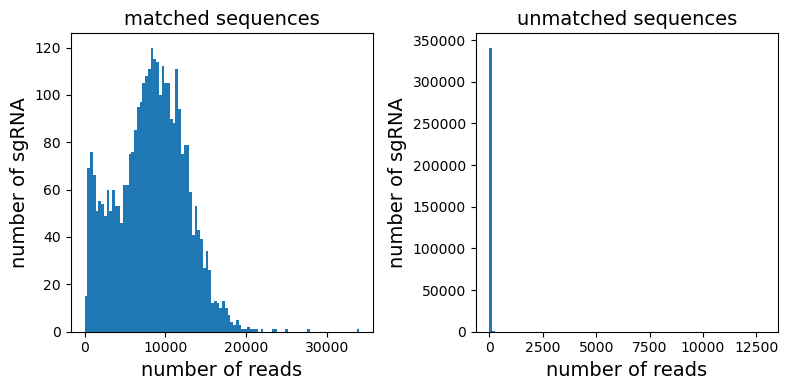

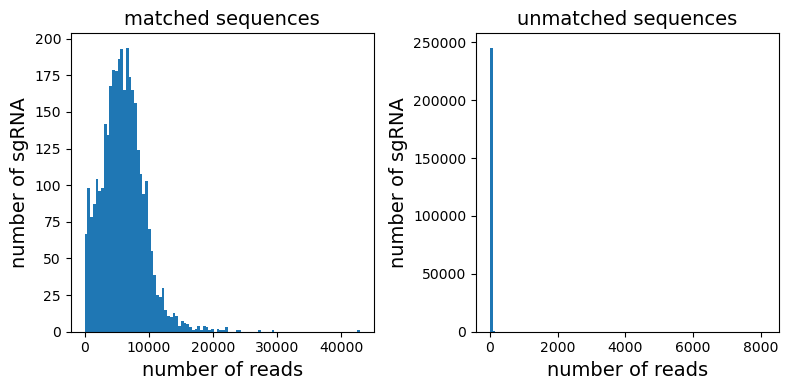

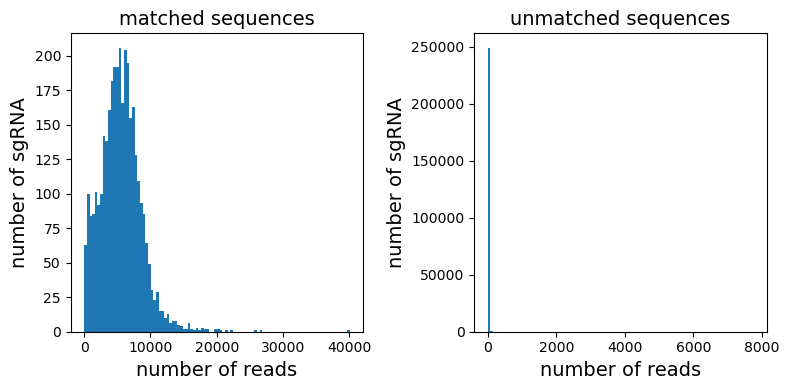

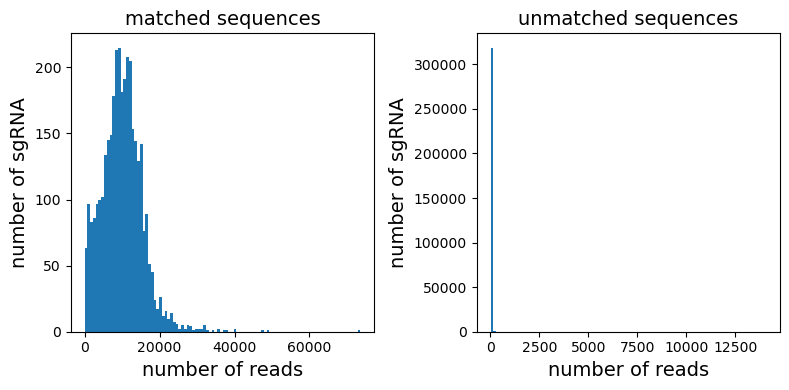

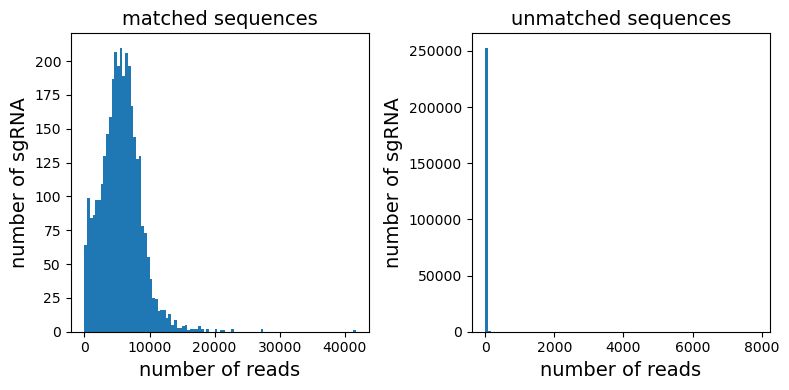

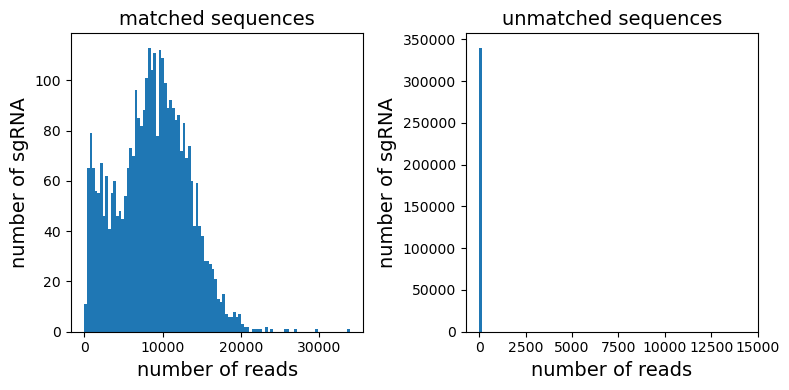

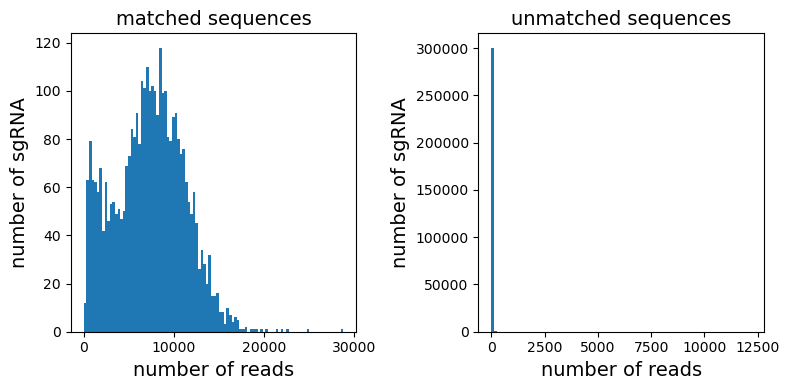

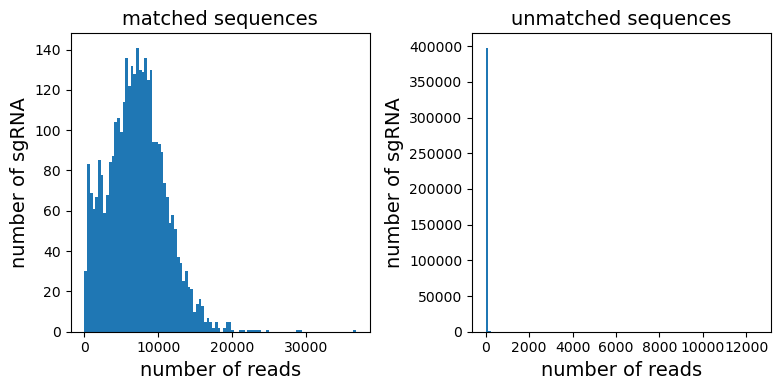

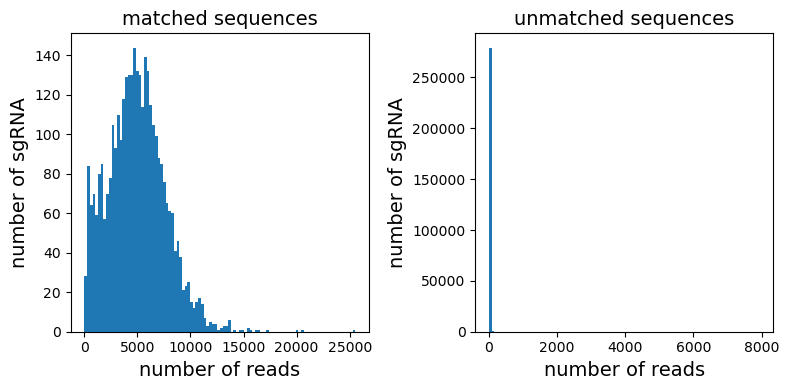

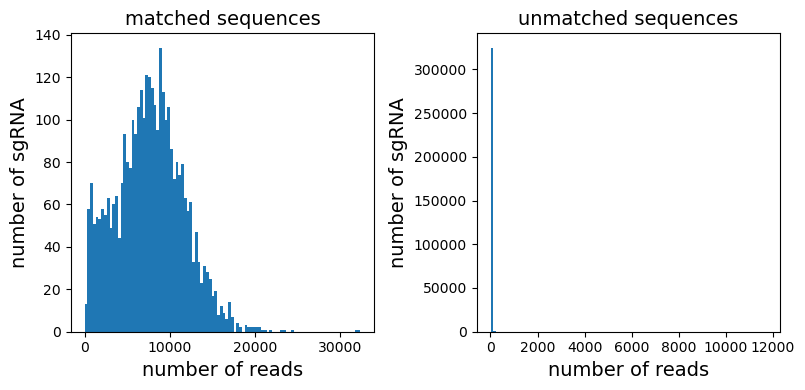

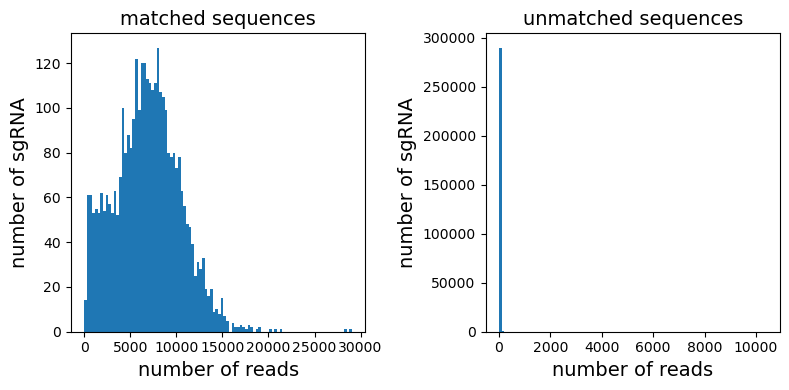

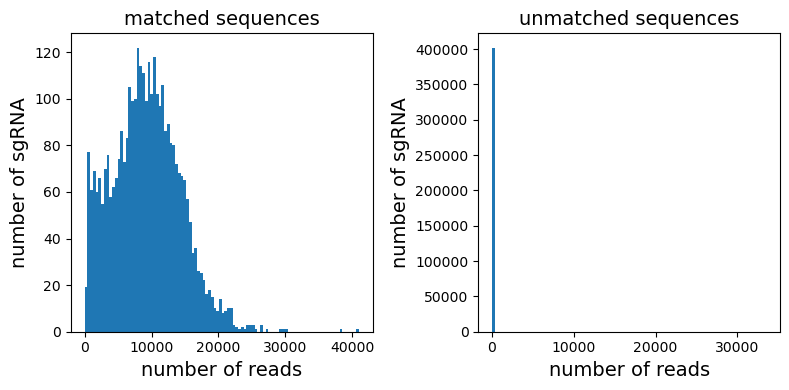

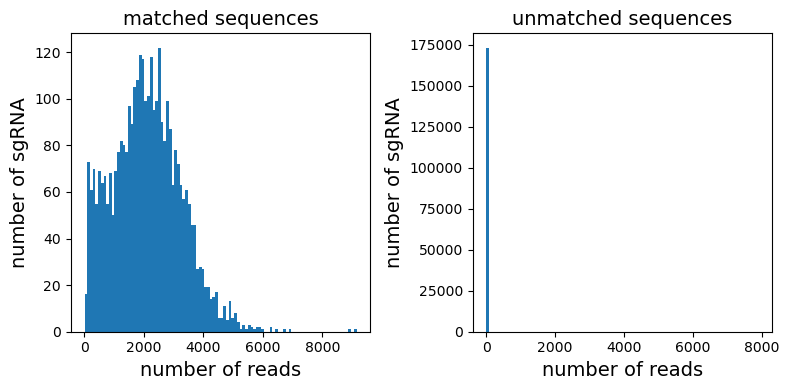

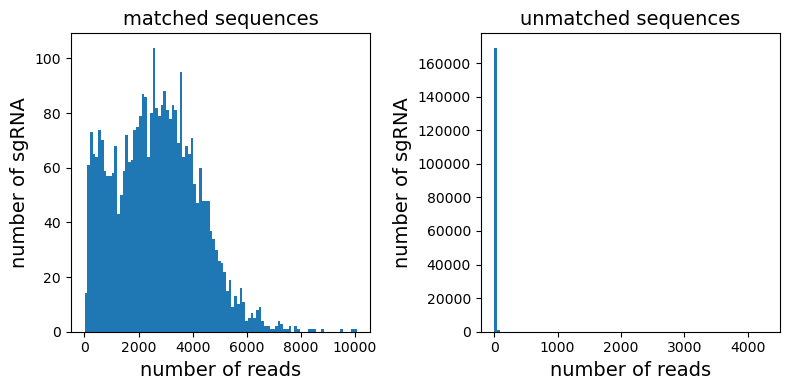

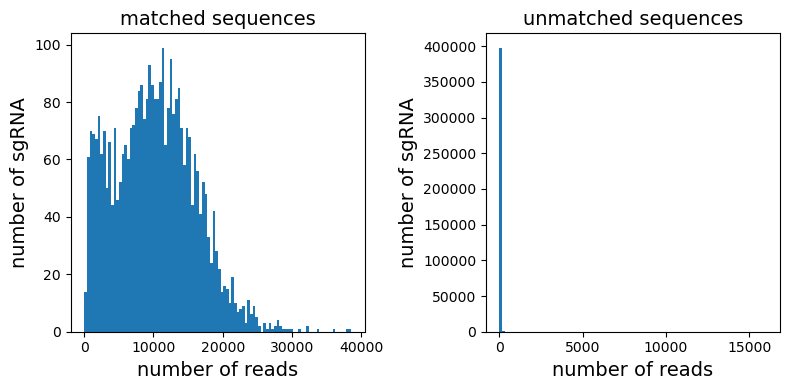

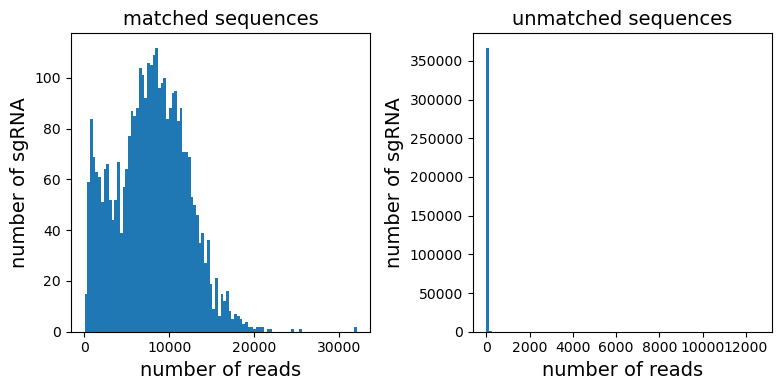

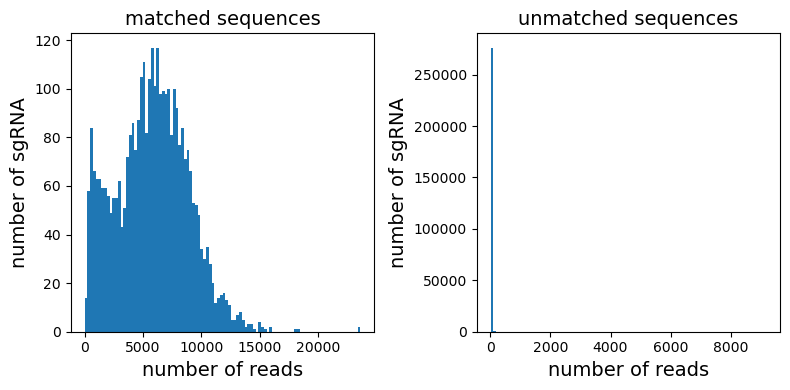

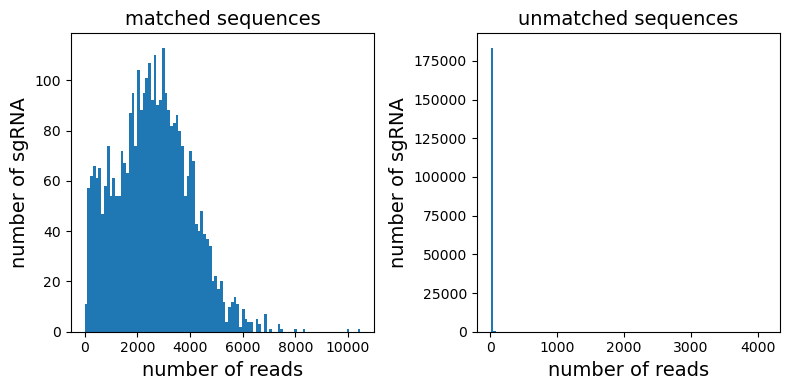

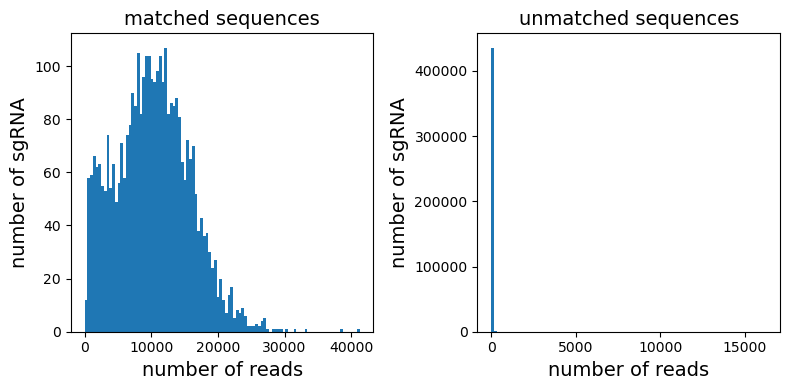

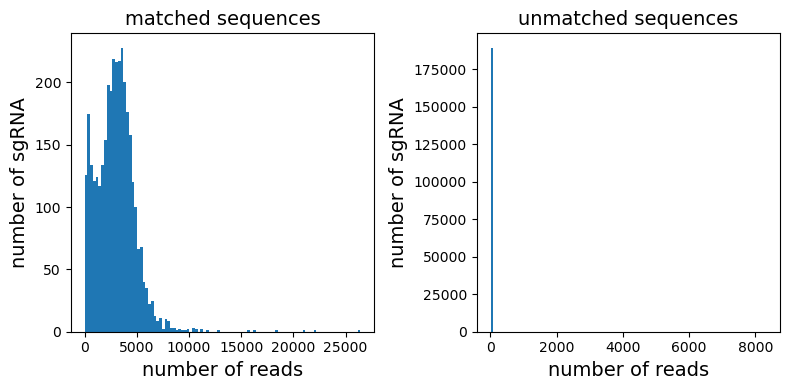

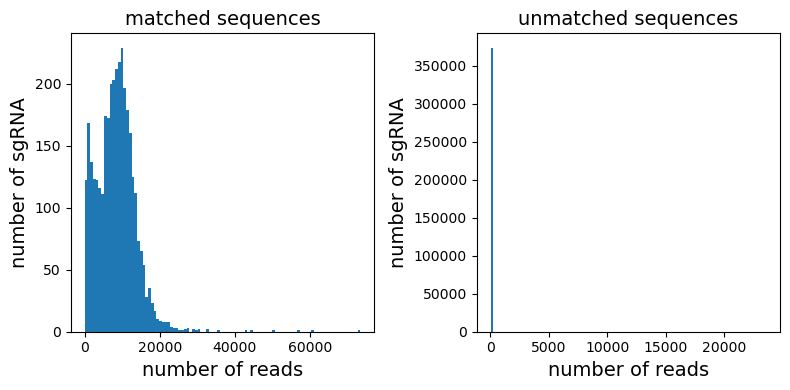

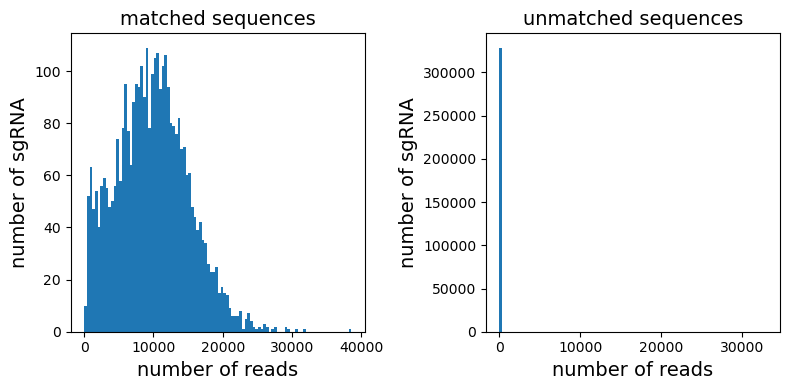

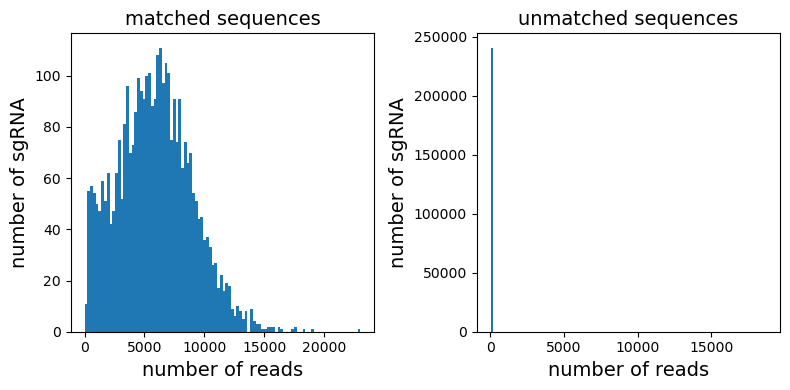

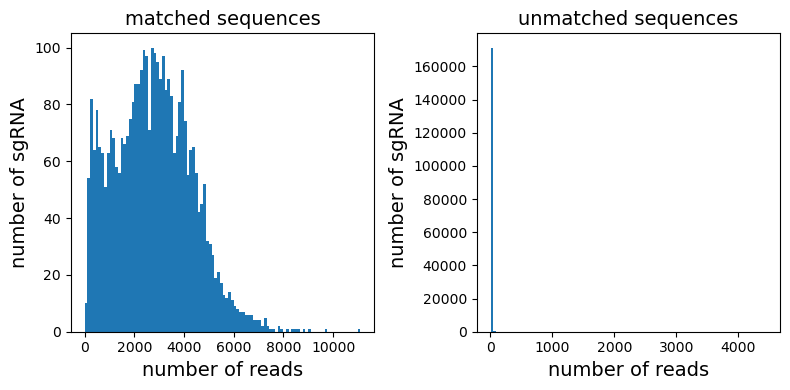

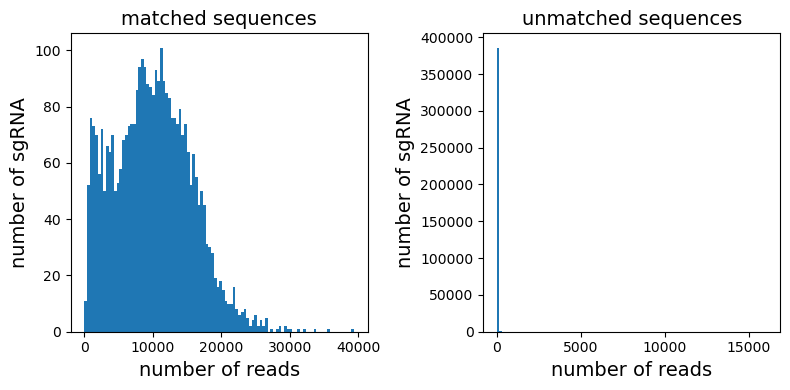

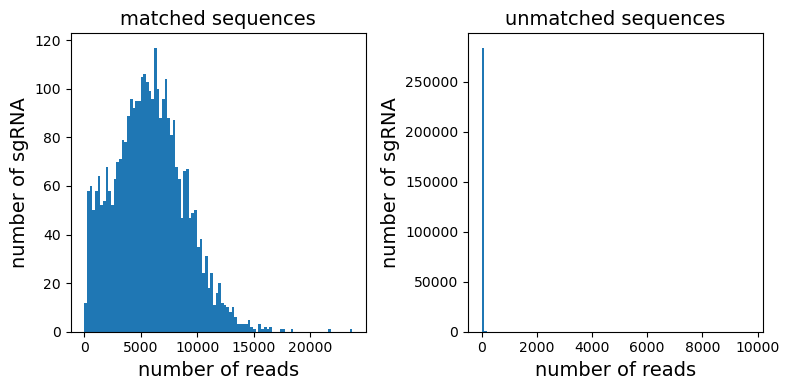

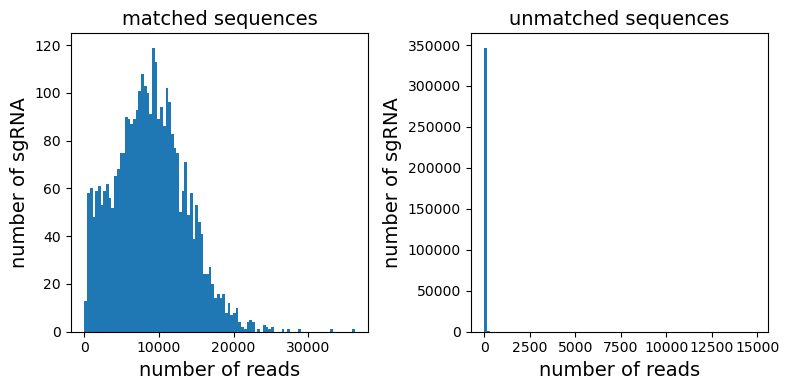

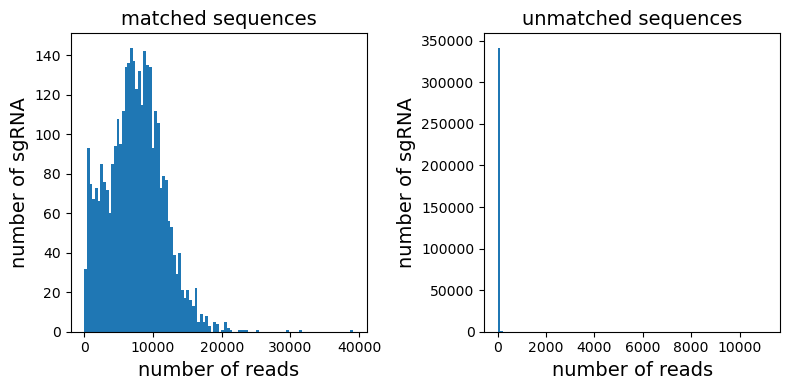

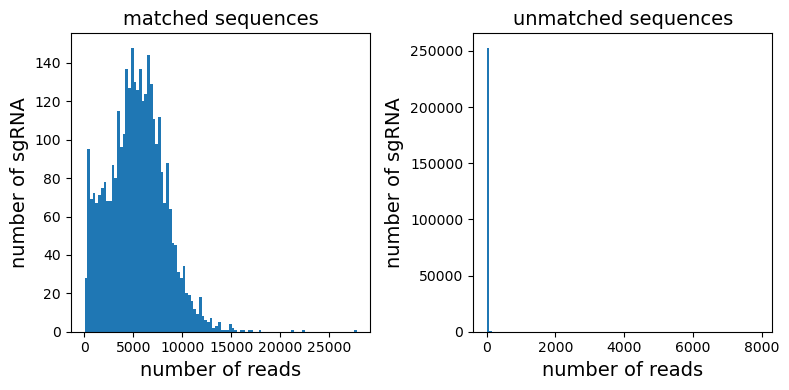

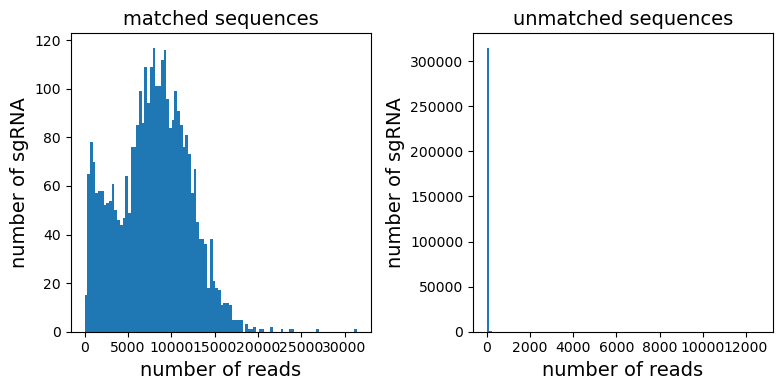

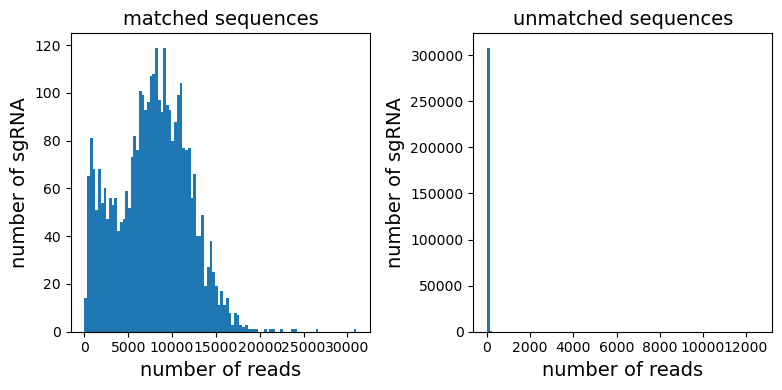

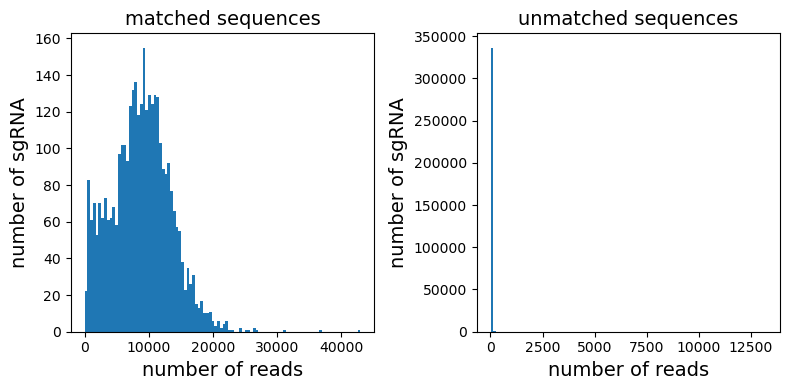

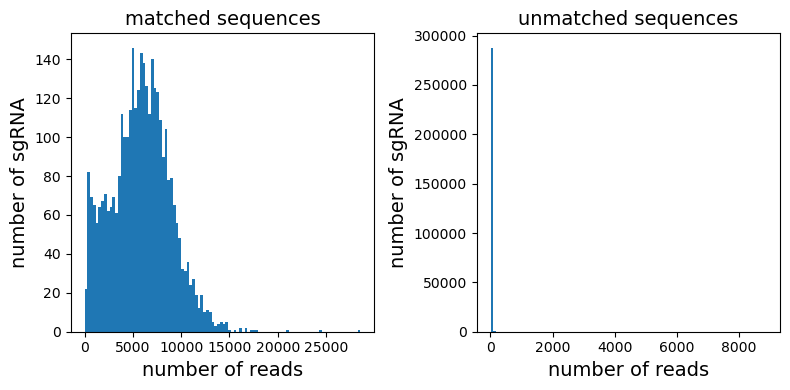

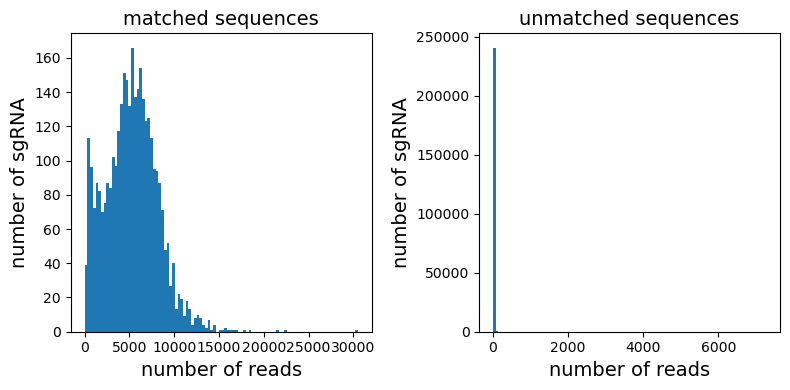

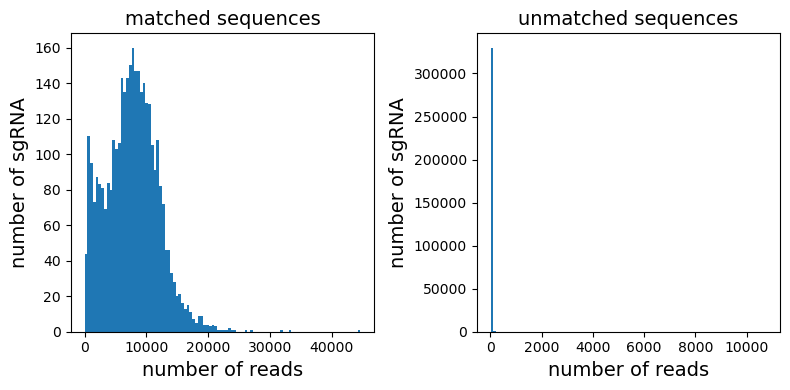

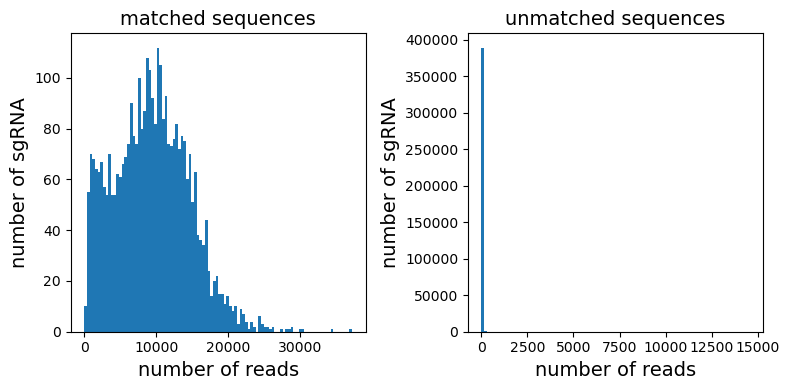

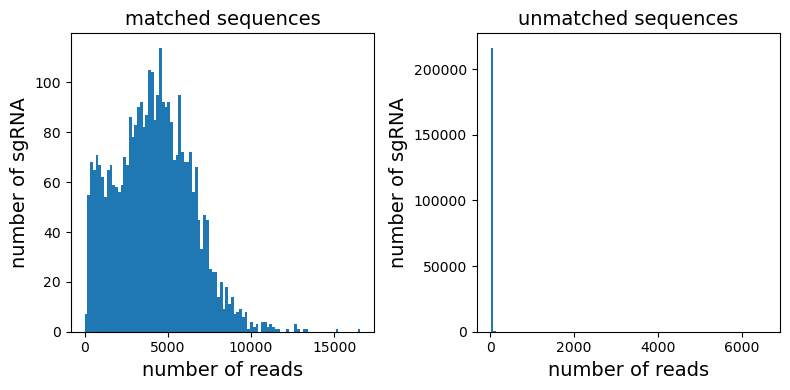

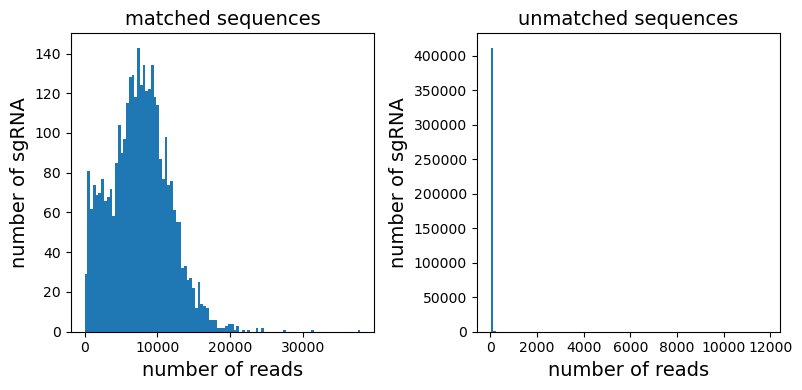

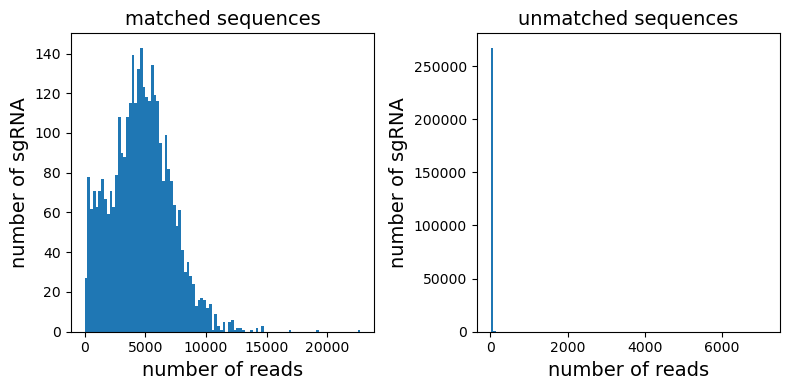

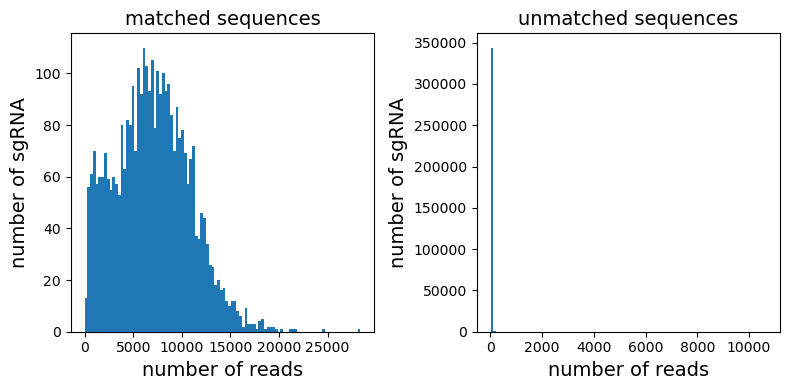

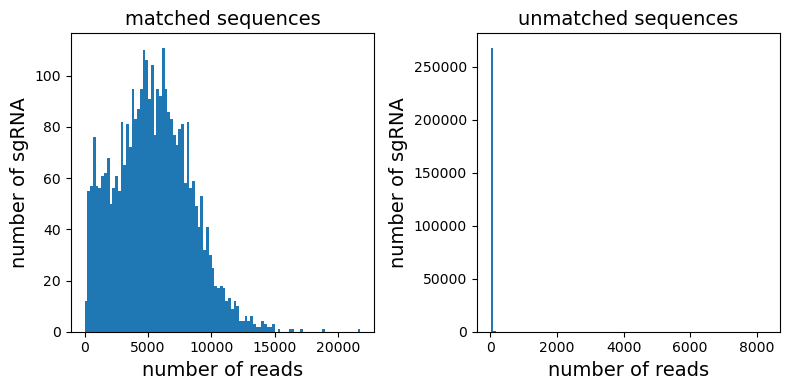

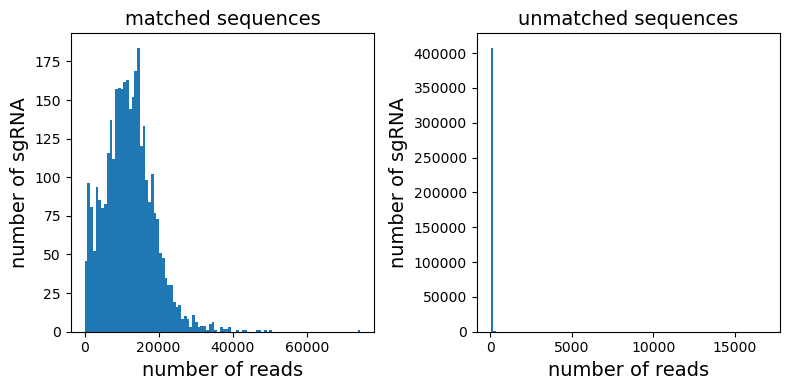

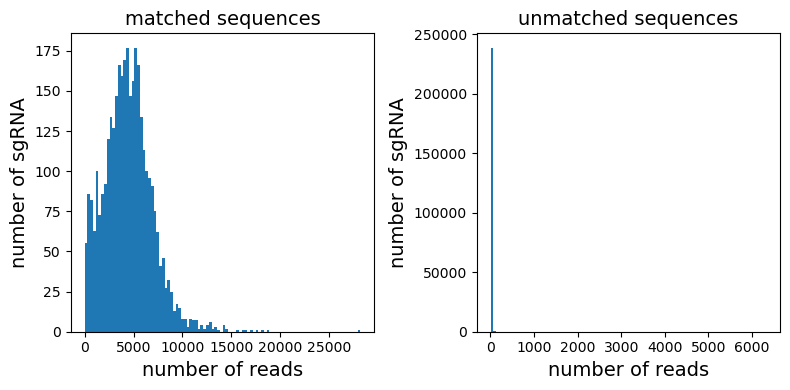

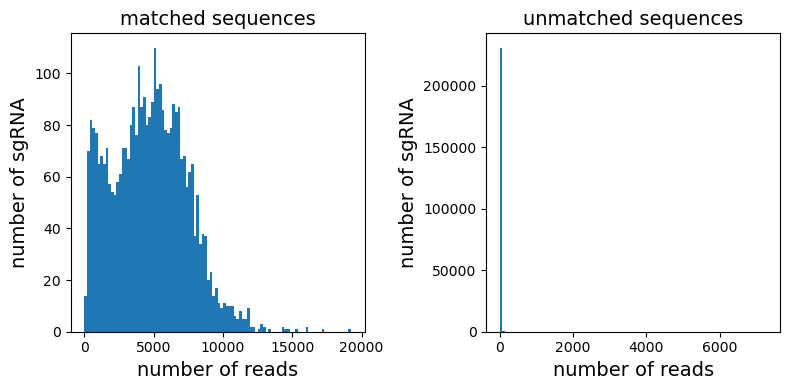

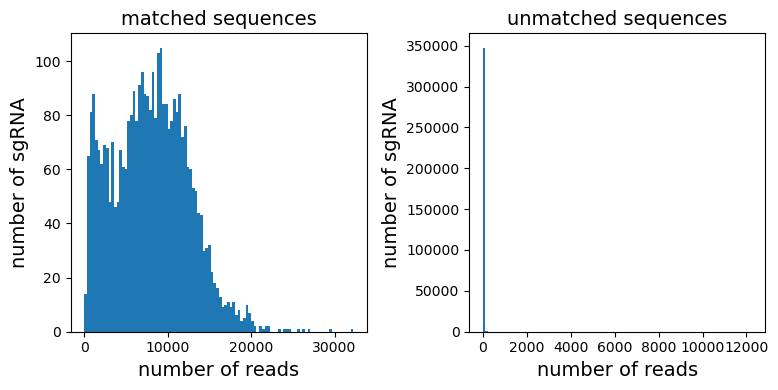

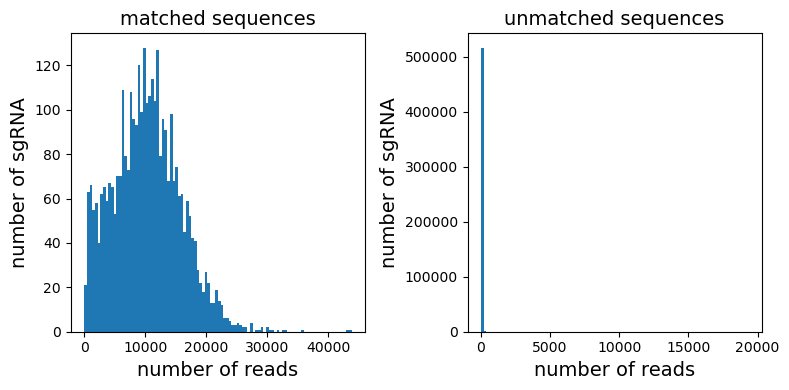

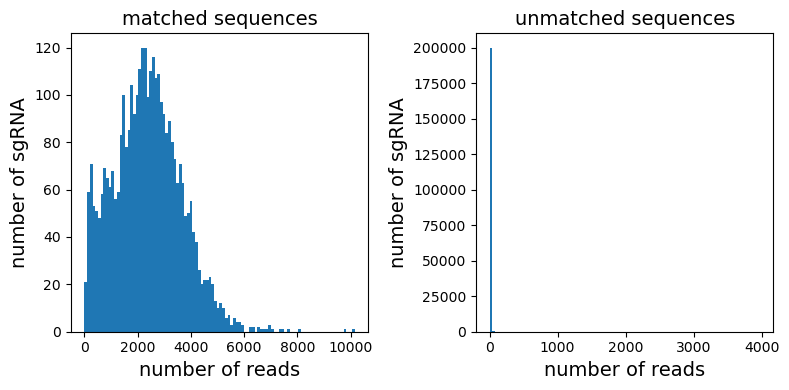

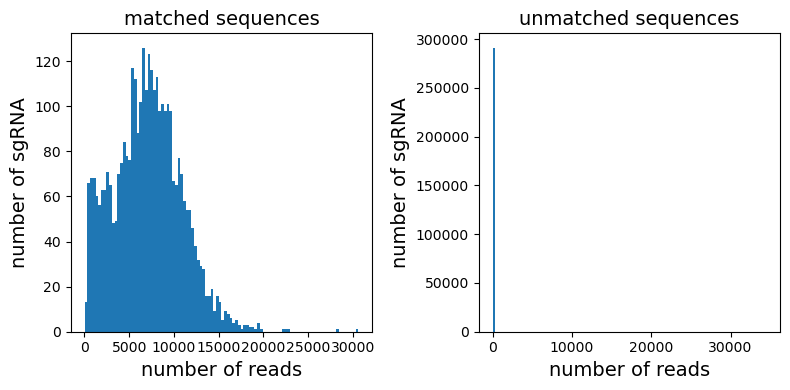

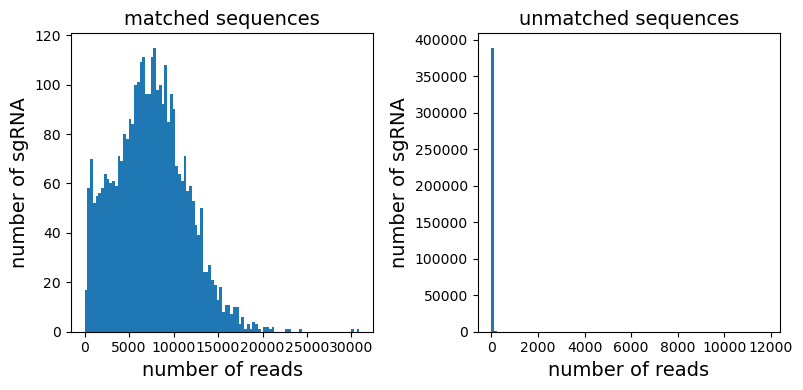

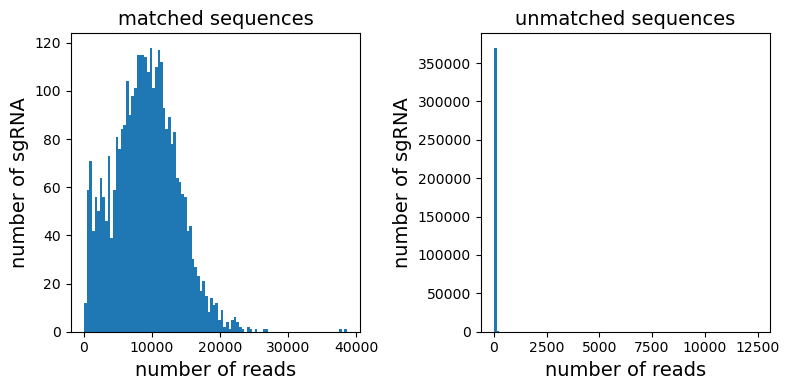

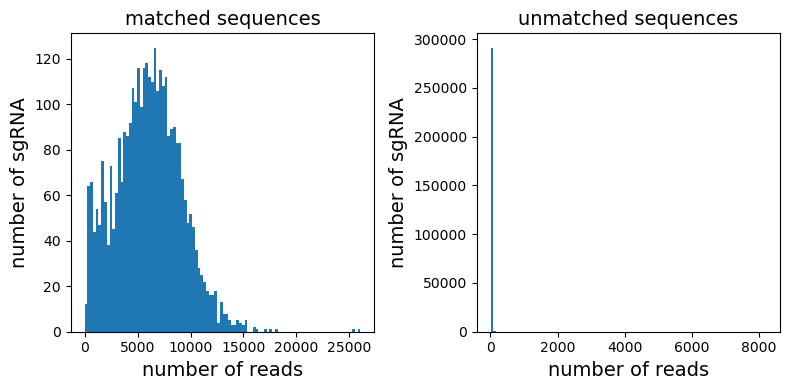

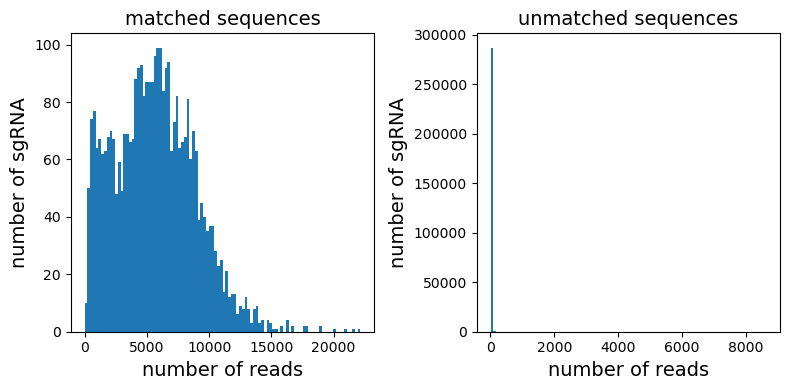

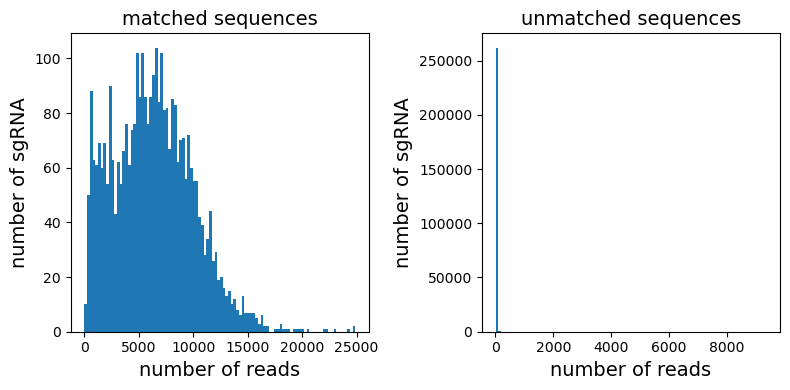

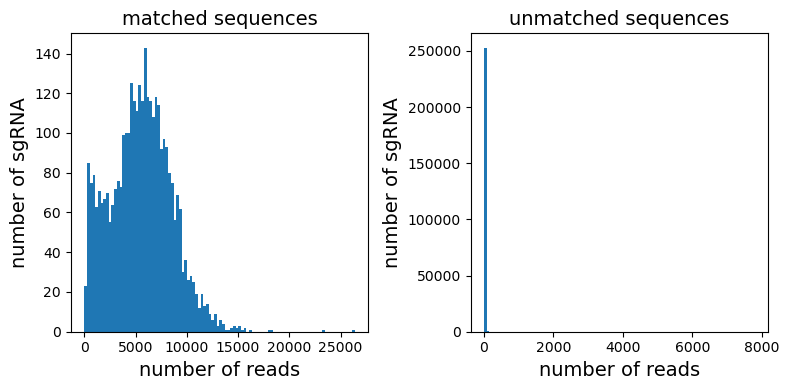

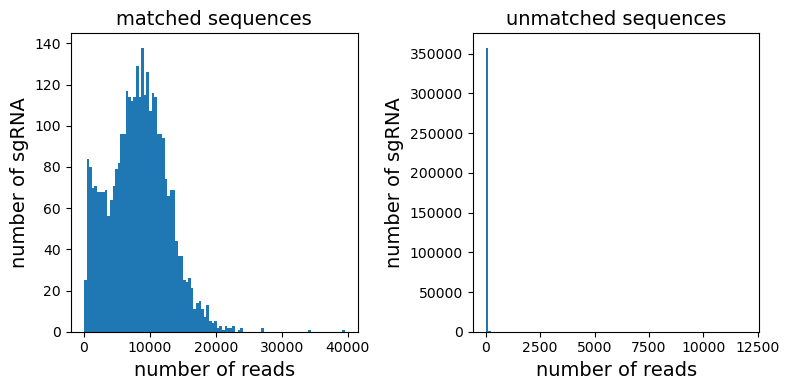

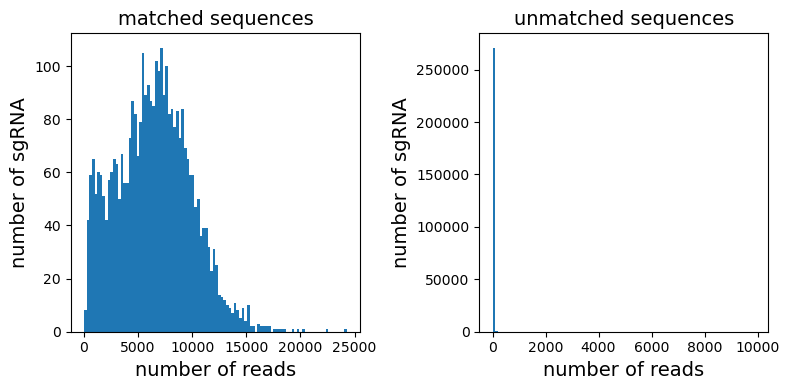

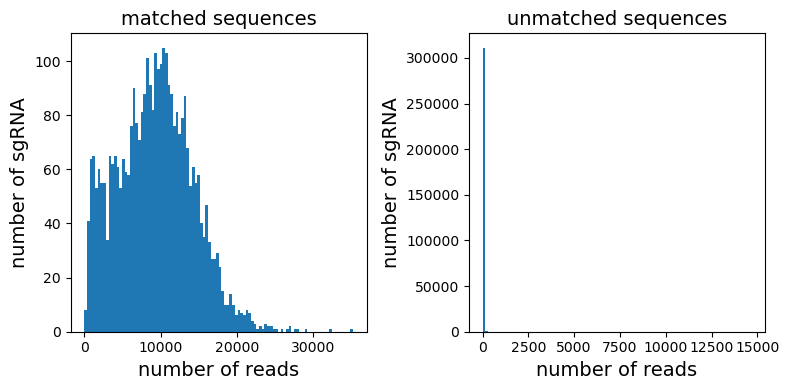

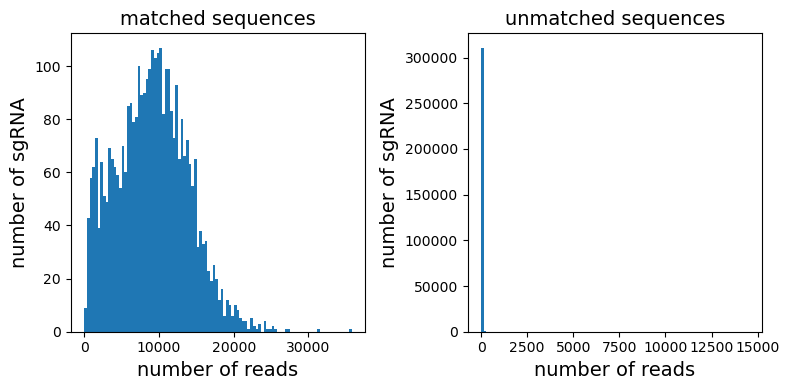

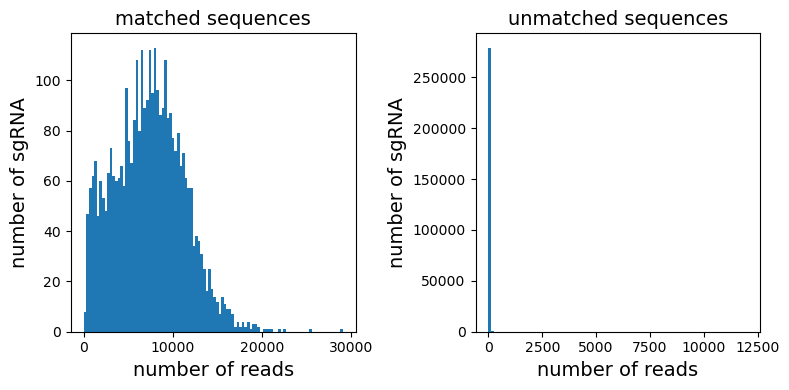

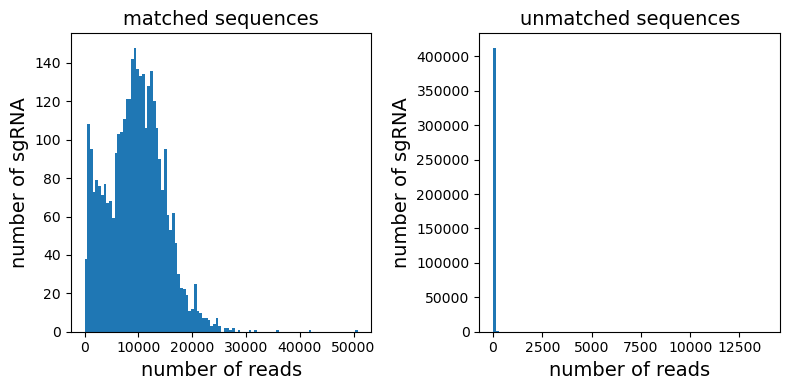

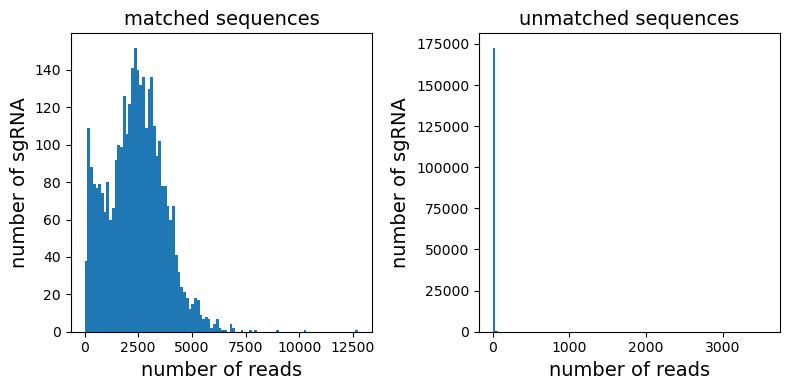

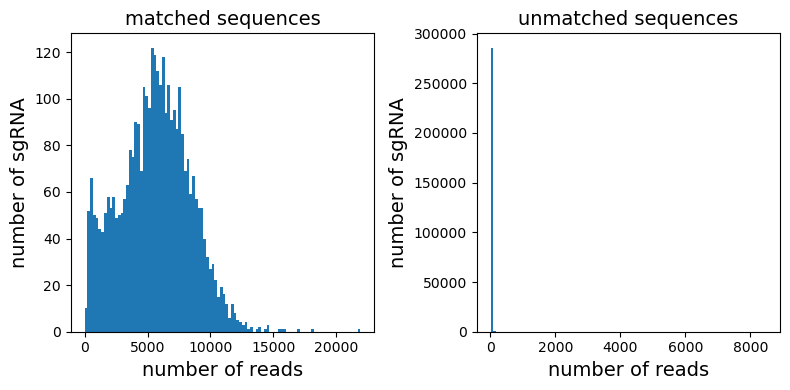

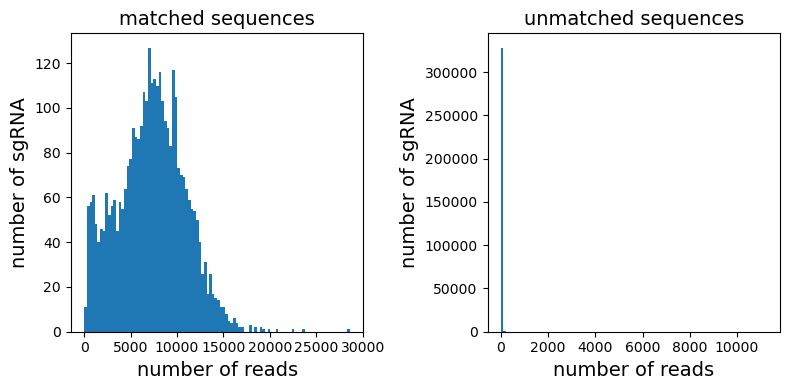

In [24]:
for f in files:
    print(f)
    f_fa = f.split('.fq.gz')[0] + '.fa'
    !seqtk seq -a {f} > {f_fa}
    
    df1 = pd.read_csv(f_fa)
    df1.columns = ['seq']
    df1 = df1[~df1.seq.str.contains('>')]

    df1['trim']  = df1.seq.str.split('AAACACCG').str[1]
    df1['sgRNA'] = df1['trim'].str[:20]
    df1 = df1[['sgRNA']]

    df1['index'] = np.arange(len(df1))
    df1_counts = df1.groupby('sgRNA')['index'].count().reset_index()

    f_save = f.split('.fq.gz')[0] + '_seqtk_sgRNAcounts_20230523.csv'
    df1_counts.to_csv(f_save)

    df1_tomatch = df1_counts[~df1_counts.sgRNA.isin(df_IDs.sgRNA_sequence.values)]
    df1_matched = df1_counts[df1_counts.sgRNA.isin(df_IDs.sgRNA_sequence.values)]
    
    fig, ax = plt.subplots(1,2, figsize = (8,4))

    ax[0].hist(df1_matched['index'].values, bins = 100)
    ax[0].set_title('matched sequences', fontsize=14)
    ax[1].hist(df1_tomatch['index'].values, bins = 100)
    ax[1].set_title('unmatched sequences', fontsize=14)

    for _ax in ax:
        _ax.set_xlabel('number of reads', fontsize=14)
        _ax.set_ylabel('number of sgRNA', fontsize=14)
        
    plt.tight_layout()
    fig.savefig(f.split('01.RawData/')[0] +f.split('01.RawData/')[1].split('/')[0] + '_seqtk_sgRNAcounts_20230523_hist.pdf')
    
    print('Number of sequences matched: ', df1_matched['index'].sum())
    print('Number of sequences NOT matched: ', df1_tomatch['index'].sum(),
      '(' + str(df1_tomatch['index'].sum()/(df1_tomatch['index'].sum()+df1_matched['index'].sum())*100)[:4]+ '%)')
    
    !gzip {f_fa}
    
#     break

In [19]:
# f.split('01.RawData/')[0] +f.split('01.RawData/')[1].split('/')[0] + '_seqtk_sgRNAcounts_20230523_hist.pdf'

'/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/NB14_seqtk_sgRNAcounts_20230523_hist.pdf'

In [25]:
print('done')

done


## NB105

<!-- seqtk seq -a  NB105_CKDL210001121-1a_HVH73DSXY_L1_1.fq.gz > NB105_1.fa -->

conda install -c bioconda seqtk

seqtk seq -a  NB01_CKDL230007672-1A_H3TJGDSX7_L1_1.fq.gz > NB01_CKDL230007672-1A_H3TJGDSX7_L1_1.fa

gzip NB01_CKDL230007672-1A_H3TJGDSX7_L1_1.fa